# INTERNSHIP TASK 02

# Predictive Modeling with Linear Regression on the Palmer Penguins Dataset

# Import Libraries and Load Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the Palmer Penguins dataset
df = sns.load_dataset('penguins').dropna()

In [2]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


# Select Features and Target Variable

In [4]:
# Select the feature and target variable
X = df[['flipper_length_mm']]
y = df['body_mass_g']

# Display the first few rows
print(X.head())
print(y.head())


   flipper_length_mm
0              181.0
1              186.0
2              195.0
4              193.0
5              190.0
0    3750.0
1    3800.0
2    3250.0
4    3450.0
5    3650.0
Name: body_mass_g, dtype: float64


# Split Data into Training and Testing Sets

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the splits
print(f'Training set: {X_train.shape}, {y_train.shape}')
print(f'Testing set: {X_test.shape}, {y_test.shape}')


Training set: (266, 1), (266,)
Testing set: (67, 1), (67,)


# Train the Linear Regression Model

In [8]:
# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Display the model coefficients
print(f'Coefficient: {model.coef_[0]}')
print(f'Intercept: {model.intercept_}')


Coefficient: 50.41798199462178
Intercept: -5919.258741821233


# Make Predictions on the Test Set

In [9]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Display the first few predictions
print(y_pred[:5])


[3055.14205322 5273.53326098 3912.24774713 4063.50169311 3760.99380115]


# Evaluate Model Performance

In [11]:
# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


Mean Squared Error: 129886.71972544755
R-squared: 0.7938115564401114


# Visualize the Regression Line and Predictions

# Regression Line on Training Data

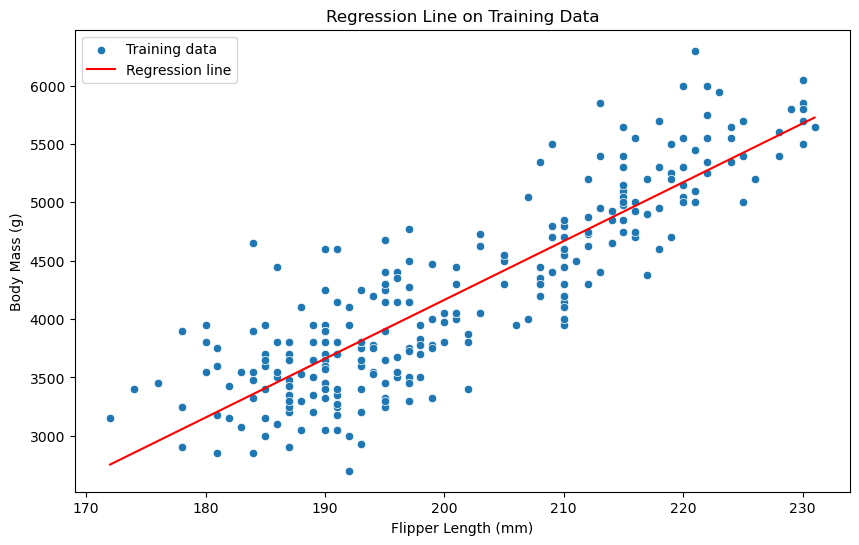

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train['flipper_length_mm'], y=y_train, label='Training data')
sns.lineplot(x=X_train['flipper_length_mm'], y=model.predict(X_train), color='red', label='Regression line')
plt.title('Regression Line on Training Data')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.legend()
plt.show()


# Actual vs Predicted Values on Test Data

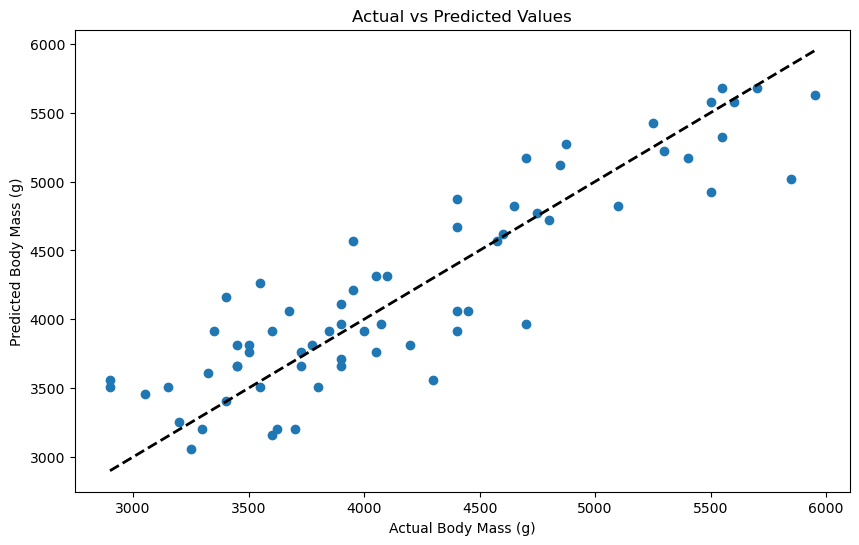

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Body Mass (g)')
plt.ylabel('Predicted Body Mass (g)')
plt.show()